# CCN EDA

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
users = []
dates = []
goals = []
contract_id = []
category = []
#mimics browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# Web Scraping all Goals Page

In [ ]:
url = "https://www.stickk.com/communities/index?type=weight"
response = requests.get(url, headers=headers)
html = BeautifulSoup(response.content, 'html.parser')
entries = html.find_all('div', class_='communitiesStickkLiveTextContainer')
# extract features from raw HTML
#<a class="communitiesCommunityJournalUsername" href="/commitment/601182">
for entry in entries:
    dates.append(entry.find('span', class_="communitiesStickkLiveTime"))
    users.append(entry.find('a', class_="communitiesCommunityJournalUsername"))
    goals.append(entry.find('span', class_="communityJournalJournal"))
    contract_id.append(entry.find('a', class_='communitiesCommunityJournalUsername')['href'])
    category.append('Weight')
url2 = "https://www.stickk.com/communities/index?type=gym"
response2 = requests.get(url2, headers=headers)
html2 = BeautifulSoup(response2.content, 'html.parser')
entries2 = html2.find_all('div', class_='communitiesStickkLiveTextContainer')
for entry2 in entries2:
    dates.append(entry2.find('span', class_="communitiesStickkLiveTime"))
    users.append(entry2.find('a', class_="communitiesCommunityJournalUsername"))
    goals.append(entry2.find('span', class_="communityJournalJournal"))
    contract_id.append(entry2.find('a', class_='communitiesCommunityJournalUsername')['href'])
    category.append('Gym')
url3 = "https://www.stickk.com/communities/index?type=savemoney"
response3 = requests.get(url3, headers=headers)
html3 = BeautifulSoup(response3.content, 'html.parser')
entries3 = html3.find_all('div', class_='communitiesStickkLiveTextContainer')
for entry3 in entries3:
    dates.append(entry3.find('span', class_="communitiesStickkLiveTime"))
    users.append(entry3.find('a', class_="communitiesCommunityJournalUsername"))
    goals.append(entry3.find('span', class_="communityJournalJournal"))
    contract_id.append(entry3.find('a', class_='communitiesCommunityJournalUsername')['href'])
    category.append('Save Money')
url4 = "https://stickk.com/communities/index?type=family"
response4 = requests.get(url4, headers=headers)
html4 = BeautifulSoup(response4.content, 'html.parser')
entries4 = html4.find_all('div', class_='communitiesStickkLiveTextContainer')
for entry4 in entries4:
    dates.append(entry4.find('span', class_="communitiesStickkLiveTime"))
    users.append(entry4.find('a', class_="communitiesCommunityJournalUsername"))
    goals.append(entry4.find('span', class_="communityJournalJournal"))
    contract_id.append(entry4.find('a', class_='communitiesCommunityJournalUsername')['href'])
    category.append('Family')
url5 = "https://www.stickk.com/communities/index?type=sports"
response5 = requests.get(url5, headers=headers)
html5 = BeautifulSoup(response5.content, 'html.parser')
entries5 = html5.find_all('div', class_='communitiesStickkLiveTextContainer')
for entry5 in entries5:
    dates.append(entry5.find('span', class_="communitiesStickkLiveTime"))
    users.append(entry5.find('a', class_="communitiesCommunityJournalUsername"))
    goals.append(entry5.find('span', class_="communityJournalJournal"))
    contract_id.append(entry5.find('a', class_='communitiesCommunityJournalUsername')['href'])
    category.append('Sports, Hobbies, Recreation')
url6 = "https://www.stickk.com/communities/index?type=education"
response6 = requests.get(url6, headers=headers)
html6 = BeautifulSoup(response6.content, 'html.parser')
entries6 = html6.find_all('div', class_='communitiesStickkLiveTextContainer')
for entry6 in entries6:
    dates.append(entry6.find('span', class_="communitiesStickkLiveTime"))
    users.append(entry6.find('a', class_="communitiesCommunityJournalUsername"))
    goals.append(entry6.find('span', class_="communityJournalJournal"))
    contract_id.append(entry6.find('a', class_='communitiesCommunityJournalUsername')['href'])
    category.append('Education & Knowledge')

In [ ]:
print(users[:10])

[<a class="communitiesCommunityJournalUsername" href="/commitment/724116">
DavidGM </a>, <a class="communitiesCommunityJournalUsername" href="/commitment/455365">
pdisperati </a>, <a class="communitiesCommunityJournalUsername" href="/commitment/601182">
Xerglint </a>, <a class="communitiesCommunityJournalUsername" href="/commitment/352393">
AmeliaJC </a>, <a class="communitiesCommunityJournalUsername" href="/commitment/741178">
Jesus21 </a>, <a class="communitiesCommunityJournalUsername" href="/commitment/757452">
Robinsi5 </a>, <a class="communitiesCommunityJournalUsername" href="/commitment/263645">
Terb </a>, <a class="communitiesCommunityJournalUsername" href="/commitment/50451">
Meden </a>, <a class="communitiesCommunityJournalUsername" href="/commitment/601182">
Xerglint </a>, <a class="communitiesCommunityJournalUsername" href="/commitment/635179">
billywelch </a>]


# Remove HTML Tags From column Entries

In [ ]:
span_pat = re.compile(r">([^<]+)</span>")
a_pat = re.compile(r">([^<]+)</a>")
commitment_pat = re.compile(r"commitment/(\d+)")

# Apply transformations directly in list comprehensions
users = [re.findall(a_pat, user)[0] if 'a' in user else user for user in users]
dates = [re.findall(span_pat, str(date))[0] if 'span' in str(date) else str(date) for date in dates]
goals = [re.findall(span_pat, str(goal))[0] if 'span' in str(goal) else str(goal) for goal in goals]
contract_id = [re.findall(commitment_pat, str(i))[0] if 'commitment' in str(i) else str(i) for i in contract_id]

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Users': users, 'Single Entry': goals, 'Category': category, 'Contract_id': contract_id})

# Display the first few rows of the DataFrame
df.head()

,Date,Users,Single Entry,Category,Contract_id
0,"\nApr 24, 2024, 4:10 AM",[\nDavidGM ],"""Still on track.""",Weight,724116
1,"\nApr 24, 2024, 12:06 AM",[\npdisperati ],"""Yay""",Weight,455365
2,"\nApr 23, 2024, 1:43 PM",[\nXerglint ],"""52.25""",Weight,601182
3,"\nApr 23, 2024, 12:43 PM",[\nAmeliaJC ],"""Happy Birthday to me, not bright.""",Weight,352393
4,"\nApr 23, 2024, 12:33 PM",[\nJesus21 ],"""My routine and bad habits have been thwarted....",Weight,741178


# Helper Functions for Data Cleaning

In [ ]:
def extract_span(word):
    word = str(word)
    pat = r">([^<]+)</span>"
    return re.findall(pat, word)[0]
def extract_div(word):
    word = str(word)
    pat = r">([^<]+)</div>"
    return re.findall(pat, word)[0]

# Scraping Goals Per Person

In [ ]:
with requests.Session() as session:
    session.headers.update({
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'
    })

    contract_goals = {}

    for contract in contract_id:
        target_url = f'https://www.stickk.com/commitment/details/{contract}'

        try:
            response = session.get(target_url)
            response.raise_for_status()  # Check that the request was successful

            soup = BeautifulSoup(response.content, 'html.parser')
            commit_div = soup.find('div', id="iCommitToTitleText")

            if commit_div:
                contract_goals[str(contract)] = commit_div.text.strip()
            else:
                # Attempt to find the alternate div and extract text from the span within it
                alternative_div = soup.find('div', id="commitmentSummaryICommitToText")
                if alternative_div and alternative_div.find('span'):
                    contract_goals[str(contract)] = alternative_div.find('span').text.strip()
                else:
                    contract_goals[str(contract)] = "No goal text found"

        except requests.RequestException as e:
            print(f"Request error for {contract}: {e}")
        except Exception as e:
            print(f"Error processing {contract}: {e}")

    print(contract_goals)

{'724116': 'Lose 11.1 kgs in 24 week(s)', '455365': 'No goal text found', '601182': 'Paint at least once a week in January', '352393': 'No goal text found', '741178': 'Lose 17 lbs. in 8 week(s)', '757452': 'No goal text found', '263645': 'Brush my teeth at night everyday', '50451': 'No goal text found', '635179': 'etwet', '556766': 'Lose 15 lbs. in 16 week(s)', '638443': 'Lose 7 kgs in 15 week(s)', '756301': '6 Months of giving my consistent, honest, best effort to making money with kindle publishing. To sticking to the path and the trusting the process for the entire 6 months. To staying dedicated to my dream of earning location independent income and traveling the world.  I must spend a minimum of 10 hrs. per week building this business. Until I am making $4,000+/M.', '758699': 'Lose 7 kgs in 8 week(s)', '758823': 'Exercise 6 days each week', '750371': 'No goal text found', '758447': 'Talking to as many sellers/agents as it takes to send legitimate offer sheets to 5 sellers a day or 

In [ ]:
dd = pd.DataFrame(list(contract_goals.values()), columns=['Goals'])

# Print the value counts
print('Number of Explicit Goals: ', sum(dd['Goals'] != "No goal text found"),'Total number of contracts: ', len(dd['Goals']))

Number of Explicit Goals:  60 Total number of contracts:  136


In [ ]:
# New column JOINED on contract_id for ULTIMATE end goal
df['Ultimate Goal'] = df['Contract_id'].map(contract_goals)
df.head()

,Date,Users,Single Entry,Category,Contract_id,Ultimate Goal
0,"\nApr 24, 2024, 4:10 AM",[\nDavidGM ],"""Still on track.""",Weight,724116,Lose 11.1 kgs in 24 week(s)
1,"\nApr 24, 2024, 12:06 AM",[\npdisperati ],"""Yay""",Weight,455365,No goal text found
2,"\nApr 23, 2024, 1:43 PM",[\nXerglint ],"""52.25""",Weight,601182,Paint at least once a week in January
3,"\nApr 23, 2024, 12:43 PM",[\nAmeliaJC ],"""Happy Birthday to me, not bright.""",Weight,352393,No goal text found
4,"\nApr 23, 2024, 12:33 PM",[\nJesus21 ],"""My routine and bad habits have been thwarted....",Weight,741178,Lose 17 lbs. in 8 week(s)


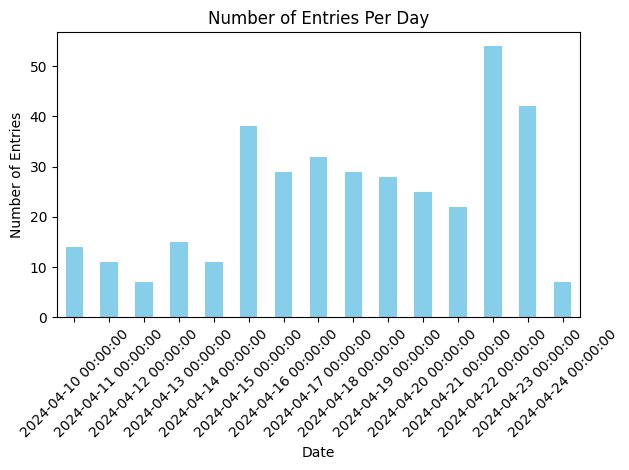

In [ ]:
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format='%b %d, %Y, %I:%M %p')
daily_entries = df.set_index('Date').resample('D').count()  # 'set_index' sets the 'Date' column as the index for resampling
# Plotting the number of entries per day
daily_entries['Users'].plot(kind='bar', color='skyblue')  # Using 'Users' column to count entries
plt.title('Number of Entries Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make it readable
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'